**Single-Cell RNA-Seq Analysis and Classification**

This project focuses on the comprehensive analysis of single-cell RNA-seq data using the Scanpy library for data preprocessing and analysis, coupled with machine learning techniques from scikit-learn for classification and model evaluation.

Project Overview
The primary goal of this project is to analyze gene expression in single-cell data to identify marker genes, cluster cells, and build classification models to predict cell groups based on gene expression.

**Single Cell analyses**

"Single cell" analysis is conducted at the level of individual cells rather than at the population level. In the context of biology and bioinformatics, single-cell analysis allows the investigation of the genome, transcriptome, proteome, or methylome of individual cells to understand their unique characteristics and differences among them.

### Key Aspects of Single-Cell Analysis:

1. **Single-Cell Genomics**:
   - **Objective**: Study of the genome of individual cells.
   - **Methods**: scDNA-seq (single-cell DNA sequencing), scCNA-seq (single-cell sequencing of copy number alterations).

2. **Single-Cell Transcriptomics**:
   - **Objective**: Study of gene expression at the level of individual cells.
   - **Methods**: scRNA-seq (single-cell RNA sequencing), SMART-seq, Drop-seq.

3. **Single-Cell Proteomics**:
   - **Objective**: Study of protein levels in individual cells.
   - **Methods**: Single-cell fluorescent microscopy imaging, mass cytometry (IMC).

4. **Single-Cell Methylomics**:
   - **Objective**: Study of DNA methylation at the level of individual cells.
   - **Methods**: scBS-seq (single-cell bisulfite sequencing), scRRBS-seq (single-cell reduced representation bisulfite sequencing).

### Advantages of Single-Cell Analysis:

- **Resolution at the Individual Cell Level**: Allows the detection of differences between cells that may be hidden when analyzed at the population level.
- **Identification of Rare Cell Types**: Helps to discover and study rare cells that may be important for understanding pathological processes.
- **Understanding Cellular Heterogeneity**: Enables the study of variability between cells within a single tissue or population.

### Applications:

- **Development of New Therapies**: Assists in identifying specific cell types and their functions, which can lead to the development of more precise and effective therapies.
- **Disease Diagnosis**: Helps in understanding pathological processes at the cellular level, which can improve diagnosis and prognosis of diseases.
- **Study of Cell Development and Differentiation**: Assists in the investigation of cellular differentiation and development processes, including embryonic development and carcinogenesis.

Overall, single-cell analysis is a powerful tool for studying complex biological systems and can significantly enhance our understanding of cellular biology and pathological processes.

In this context, a comprehensive analysis of single-cell data is performed using clustering and classification methods:

**Cell Clustering:**

- **Method:** Leiden algorithm.
- **Objective:** Grouping cells based on similarity in gene expression to identify biological subtypes of cells. This is an unsupervised method that does not require prior knowledge of class labels.

**Identifying Marker Genes:**

- **Method:** Gene ranking using the Wilcoxon method.
- **Objective:** Determining genes that are differentially expressed in different clusters, which helps in identifying specific features of each cluster.

**Cell Classification:**

- **Method:** Random Forest.
- **Objective:** Training a model to classify cells into identified clusters based on marker genes. This is a supervised method that uses known cluster labels for training and subsequent prediction.

**Model Evaluation:**

- **Methods:** Classification report and confusion matrix.
- **Objective:** Assessing the accuracy and quality of the classification model, including precision, recall, and F1-score for each cluster.

**Visualization of Results:**

- **Methods:** Feature importance plots and heatmaps of the confusion matrix.
- **Objective:** Visual representation of the analysis results, including the importance of genes in classification and the accuracy of model predictions.

**General Sequence of Actions:**

**Data Loading and Preprocessing:**

- Loading data from an H5AD file.
- Calculating and filtering cell quality.
- Normalizing and logarithmizing data.

**Cell Clustering:**

- Calculating PCA for dimensionality reduction.
- Building a neighborhood graph.
- Applying the Leiden algorithm for cell clustering.

**Identifying Marker Genes:**

- Ranking genes for each cluster.
- Filtering marker genes by adjusted p-values.

**Cell Classification:**

- Creating a feature matrix (expression of marker genes) and a target vector (cluster labels).
- Splitting data into training and test sets.
- Training a Random Forest model.
- Evaluating the model on test data.

**Visualization of Results:**

- Visualizing the confusion matrix.
- Visualizing the importance of features (genes) in the model.

**Project Objective:**
The main goal is to identify groups of cells with similar gene expression (clustering), determine marker genes for these groups, and then train a model to classify new cells into these groups. This aids in understanding biological processes, identifying different types of cells, and can have applications in disease diagnosis and treatment.

In [2]:
#загрузка данных
from google.colab import files

uploaded = files.upload()

Saving makosco.h5ad to makosco.h5ad


In [3]:
  ##Установите необходимые библиотеки

!pip install scanpy pandas numpy scipy matplotlib scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=c31363c1dea760d432e0dcabd0404612b765c58b4b8b6d8a7ef0fbc412f631e7
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [4]:
  ##Установите необходимые библиотеки
!pip install scanpy anndata



In [5]:
!pip3 install igraph leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.2 MB/s eta 0:00:00


In [6]:
   ## Загрузите данные
import scanpy as sc
import numpy as np

# Загрузка данных
adata = sc.read_h5ad('makosco.h5ad')

# Просмотр первых нескольких строк данных
print(adata)


AnnData object with n_obs × n_vars = 49300 × 24658
    obs: 'cell.id', 'cluster'


In [7]:
   ## Исследуйте данные
   print(adata)
   print(adata.obs)  # Метаданные о клетках
   print(adata.var)  # Информация о генах



AnnData object with n_obs × n_vars = 49300 × 24658
    obs: 'cell.id', 'cluster'
                         cell.id     cluster
r1_GGCCGCAGTCCG  r1_GGCCGCAGTCCG           2
r1_CTTGTGCGGGAA  r1_CTTGTGCGGGAA           2
r1_GCGCAACTGCTC  r1_GCGCAACTGCTC           2
r1_GATTGGGAGGCA  r1_GATTGGGAGGCA           2
r1_CCTCCTAGTTGG  r1_CCTCCTAGTTGG -2147483648
...                          ...         ...
p1_TCAAAAGCCGGG  p1_TCAAAAGCCGGG          24
p1_ATTAAGTTCCAA  p1_ATTAAGTTCCAA          34
p1_CTGTCTGAGACC  p1_CTGTCTGAGACC           2
p1_TAACGCGCTCCT  p1_TAACGCGCTCCT          24
p1_ATTCTTGTTCTT  p1_ATTCTTGTTCTT          24

[49300 rows x 2 columns]
Empty DataFrame
Columns: []
Index: [KITL, TMTC3, CEP290, 4930430F08RIK, 1700017N19RIK, MGAT4C, RASSF9, LRRIQ1, ADGB, SLC6A15, TMTC2, RAB32, GM15663, METTL25, N-R5S80, CCDC59, C230021G24RIK, PPFIA2, GRM1, ACSS3, LIN7A, MYF5, MYF6, PTPRQ, OTOGL, PPP1R12A, PAWR, GM25591, SYT1, GM23041, NAV3, E2F7, CSRP2, ZDHHC17, GM5428, OSBPL8, BBS10, NAP1L1, GM25117, S

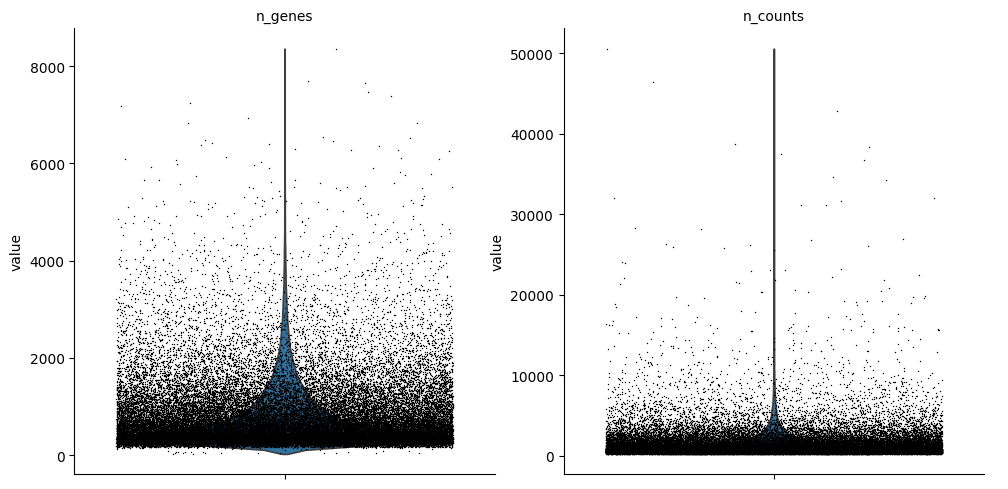

In [8]:

## Расчет QC метрик
# Добавление столбцов 'n_genes', 'n_counts' и 'pct_counts_mt' вручную
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1  # Преобразование в одномерный массив
adata.obs['n_counts'] = adata.X.sum(axis=1).A1  # Преобразование в одномерный массив


## Визуализация QC метрик
sc.pl.violin(adata, ['n_genes', 'n_counts'], jitter=0.4, multi_panel=True)




In [9]:
## Фильтрация данных
adata = adata[adata.obs.n_genes > 200]  # Удаление клеток с малым количеством генов
adata = adata[adata.obs.n_counts < 7000]  # Удаление клеток с чрезмерным количеством считываний

## Нормализация и логарифмирование данных
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)



/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
## Вычисление PCA
sc.pp.pca(adata)



In [12]:
## Вычисление графа соседства
sc.pp.neighbors(adata)



In [13]:
## Кластеризация с использованием Leiden
sc.tl.leiden(adata)

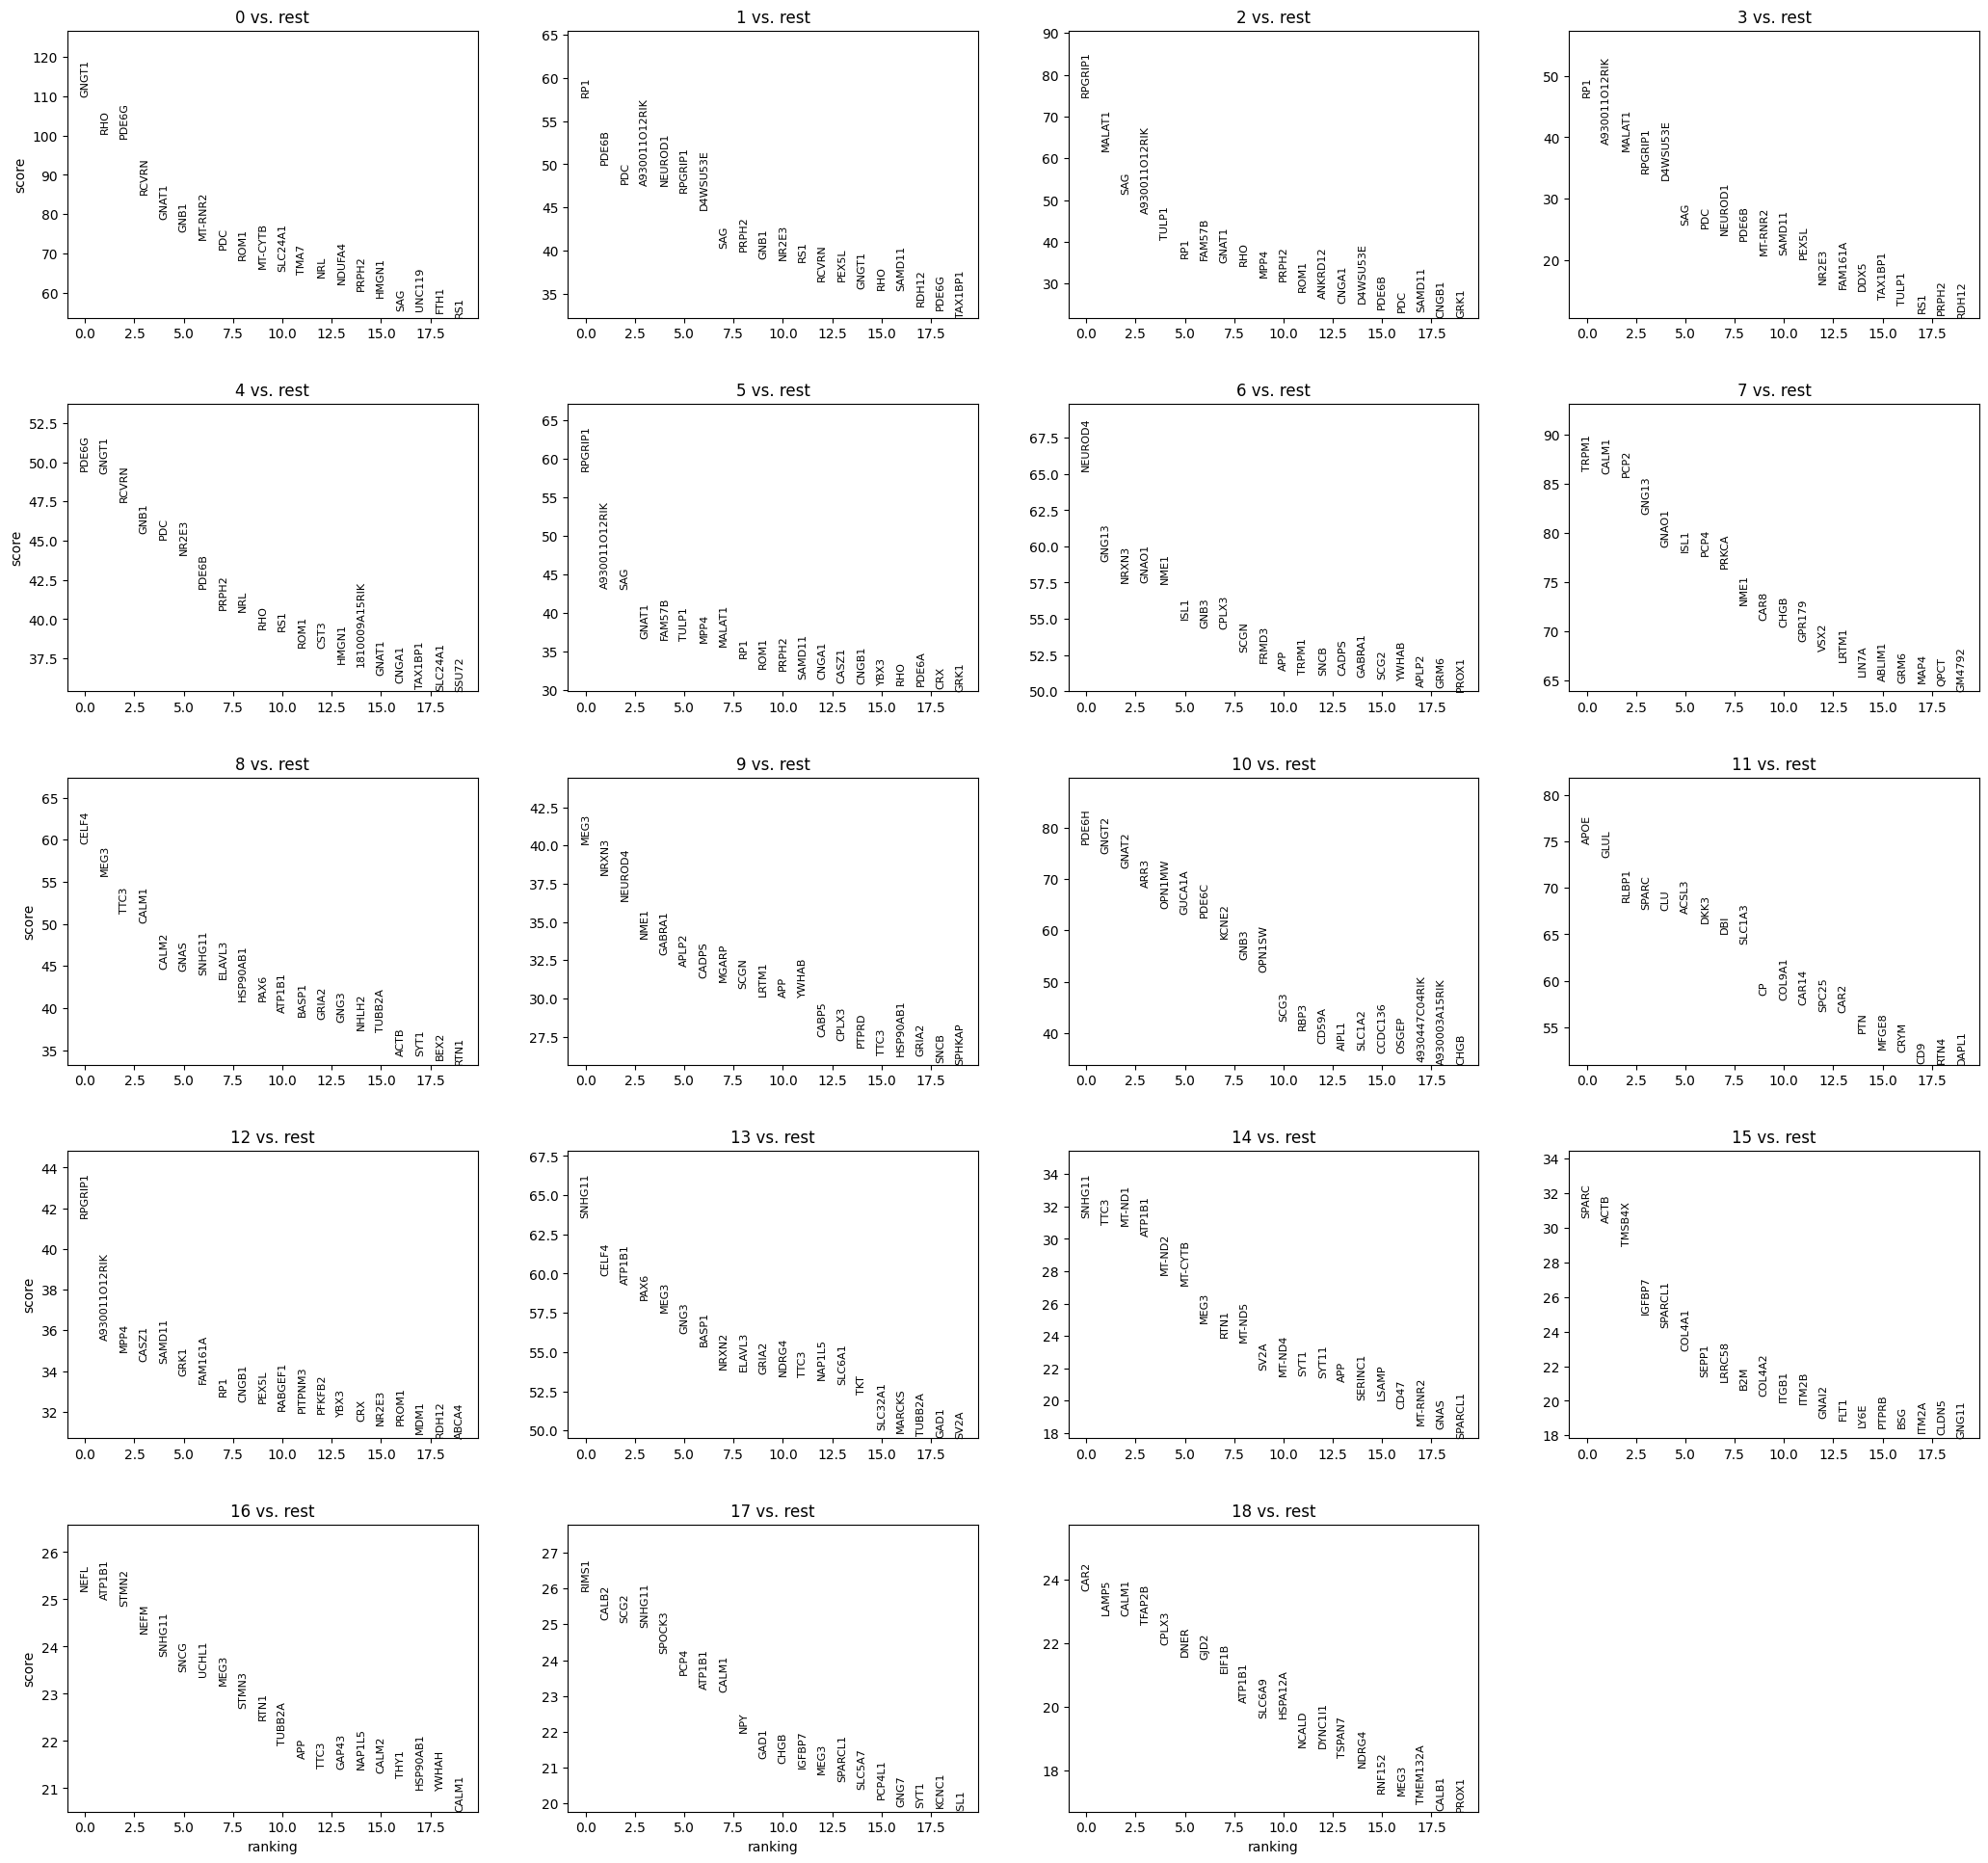

In [16]:
## Ранжирование генов
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')  # rank_genes_groups() для ранжирования генов

## Визуализация результатов
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, show=False)


In [17]:
# Вывод доступных генов
print("Доступные гены:")
print(adata.var_names)



Доступные гены:
Index(['KITL', 'TMTC3', 'CEP290', '4930430F08RIK', '1700017N19RIK', 'MGAT4C',
       'RASSF9', 'LRRIQ1', 'ADGB', 'SLC6A15',
       ...
       'RP23-341H6.1', 'GM26101', 'GM26851', 'GM15023', '4930513O06RIK',
       'VSIG1', 'GM16390', 'GM25207', '1110059M19RIK', 'GM20861'],
      dtype='object', length=24658)


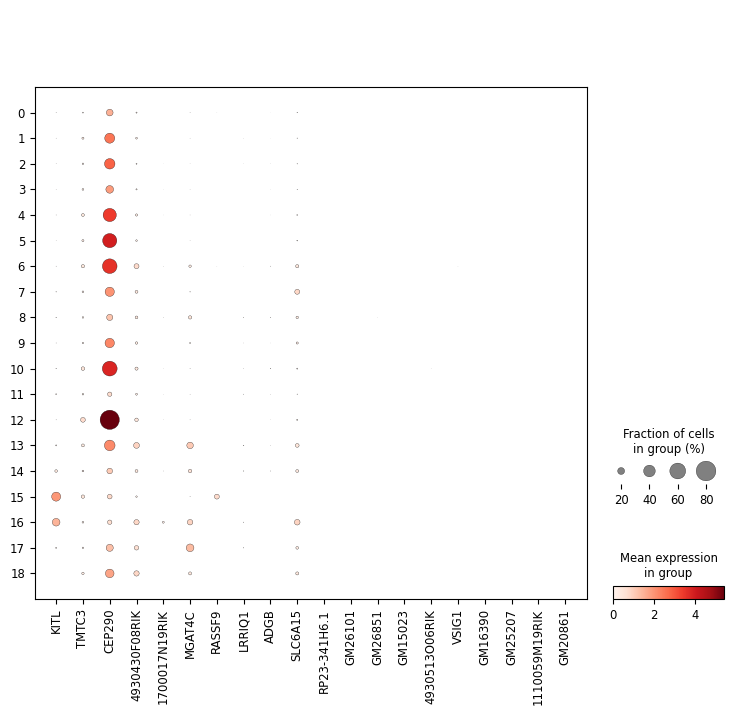

In [18]:
# Example definition of selected_genes
selected_genes = ['KITL', 'TMTC3', 'CEP290', '4930430F08RIK', '1700017N19RIK', 'MGAT4C',
                  'RASSF9', 'LRRIQ1', 'ADGB', 'SLC6A15', 'RP23-341H6.1', 'GM26101', 'GM26851', 'GM15023', '4930513O06RIK',
                  'VSIG1', 'GM16390', 'GM25207', '1110059M19RIK', 'GM20861']


# Проверка наличия выбранных генов
for gene in selected_genes:
    if gene not in adata.var_names:
        raise KeyError(f"Gene '{gene}' is not found in adata.var_names")

# точечная диаграмма
sc.pl.dotplot(adata, var_names=selected_genes, groupby='leiden')

Regarding the clustering performed in the first stage of single-cell data analysis using the Leiden algorithm, the following conclusions can be made:

Identification of Cellular Subtypes:

Conclusion: The Leiden algorithm successfully grouped cells based on similarity in gene expression, revealing various cellular subtypes.

Significance: This allows understanding the diversity of cells in the studied population and can be critical for understanding the functional differences between these subtypes.

Homogeneity Within Clusters:

Conclusion: Cells within each cluster demonstrate similar gene expression, indicating their biological homogeneity.

Significance: The homogeneity within clusters confirms that the algorithm correctly identified groups of cells with similar biological characteristics.

Differences Between Clusters:

Conclusion: Significant differences in gene expression are observed between different clusters, indicating the presence of biologically meaningful differences between cellular subtypes.

Significance: These differences can be used for further study of the functional features of each cellular subtype and their role in biological processes.

Applicability in Biological Research:

Conclusion: The clustering results can be used for the identification and classification of various cell types, which is important for understanding cellular biology and pathological processes.

Significance: This opens up opportunities for a deeper study of cellular interactions and their role in health and disease.

Preparation of Data for Subsequent Analysis:

Conclusion: Cell clustering is an important preliminary step for subsequent analysis, such as identifying marker genes and classifying cells.

Significance: Proper clustering execution provides a reliable foundation for further analysis steps, enhancing the accuracy and interpretability of the results.

General Conclusion:
Cell clustering using the Leiden algorithm allowed for the successful identification of various cellular subtypes based on similarity in gene expression. The results indicate biological homogeneity within clusters and significant differences between them, which is important for understanding cellular biology and pathological processes. This data preparation step provides a reliable foundation for subsequent analysis, including identifying marker genes and classifying cells. Next, clustering will be used on larger features to further refine the analysis.

In [19]:
!pip install scanpy

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


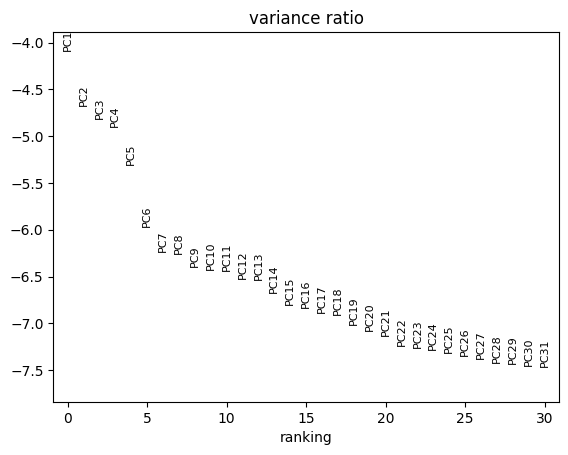

In [20]:
import scanpy as sc

# Загрузка данных
adata = sc.read_h5ad('makosco.h5ad')

# Заполнение NaN
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

# PCA анализ
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
import scanpy as sc

# Установка leidenalg, если она не установлена
try:
    import leidenalg
except ModuleNotFoundError:
    !pip install leidenalg

# Загрузка данных
adata = sc.read_h5ad('makosco.h5ad')

In [22]:
# Заполнение NaN
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


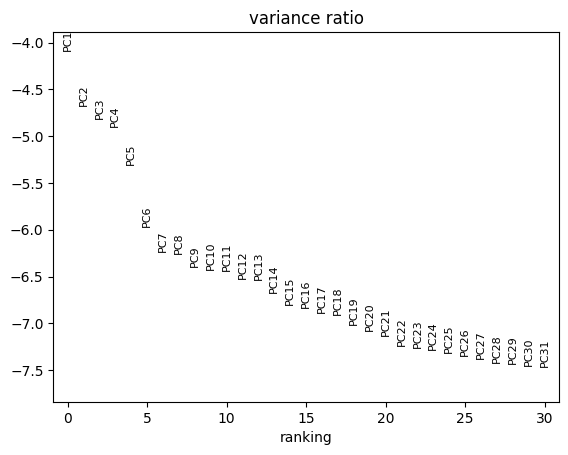

In [23]:
# PCA анализ
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [24]:
# Вычисление графа соседей
sc.pp.neighbors(adata)

In [25]:
# UMAP анализ
sc.tl.umap(adata)

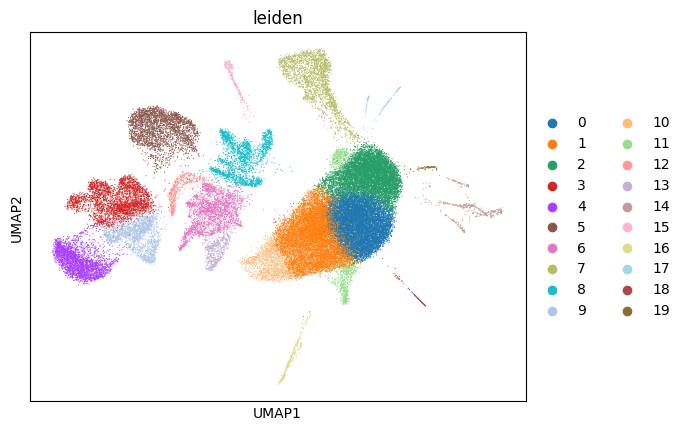

In [26]:
# Кластеризация
sc.tl.leiden(adata)
# Визуализация кластеров
sc.pl.umap(adata, color=['leiden'])

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

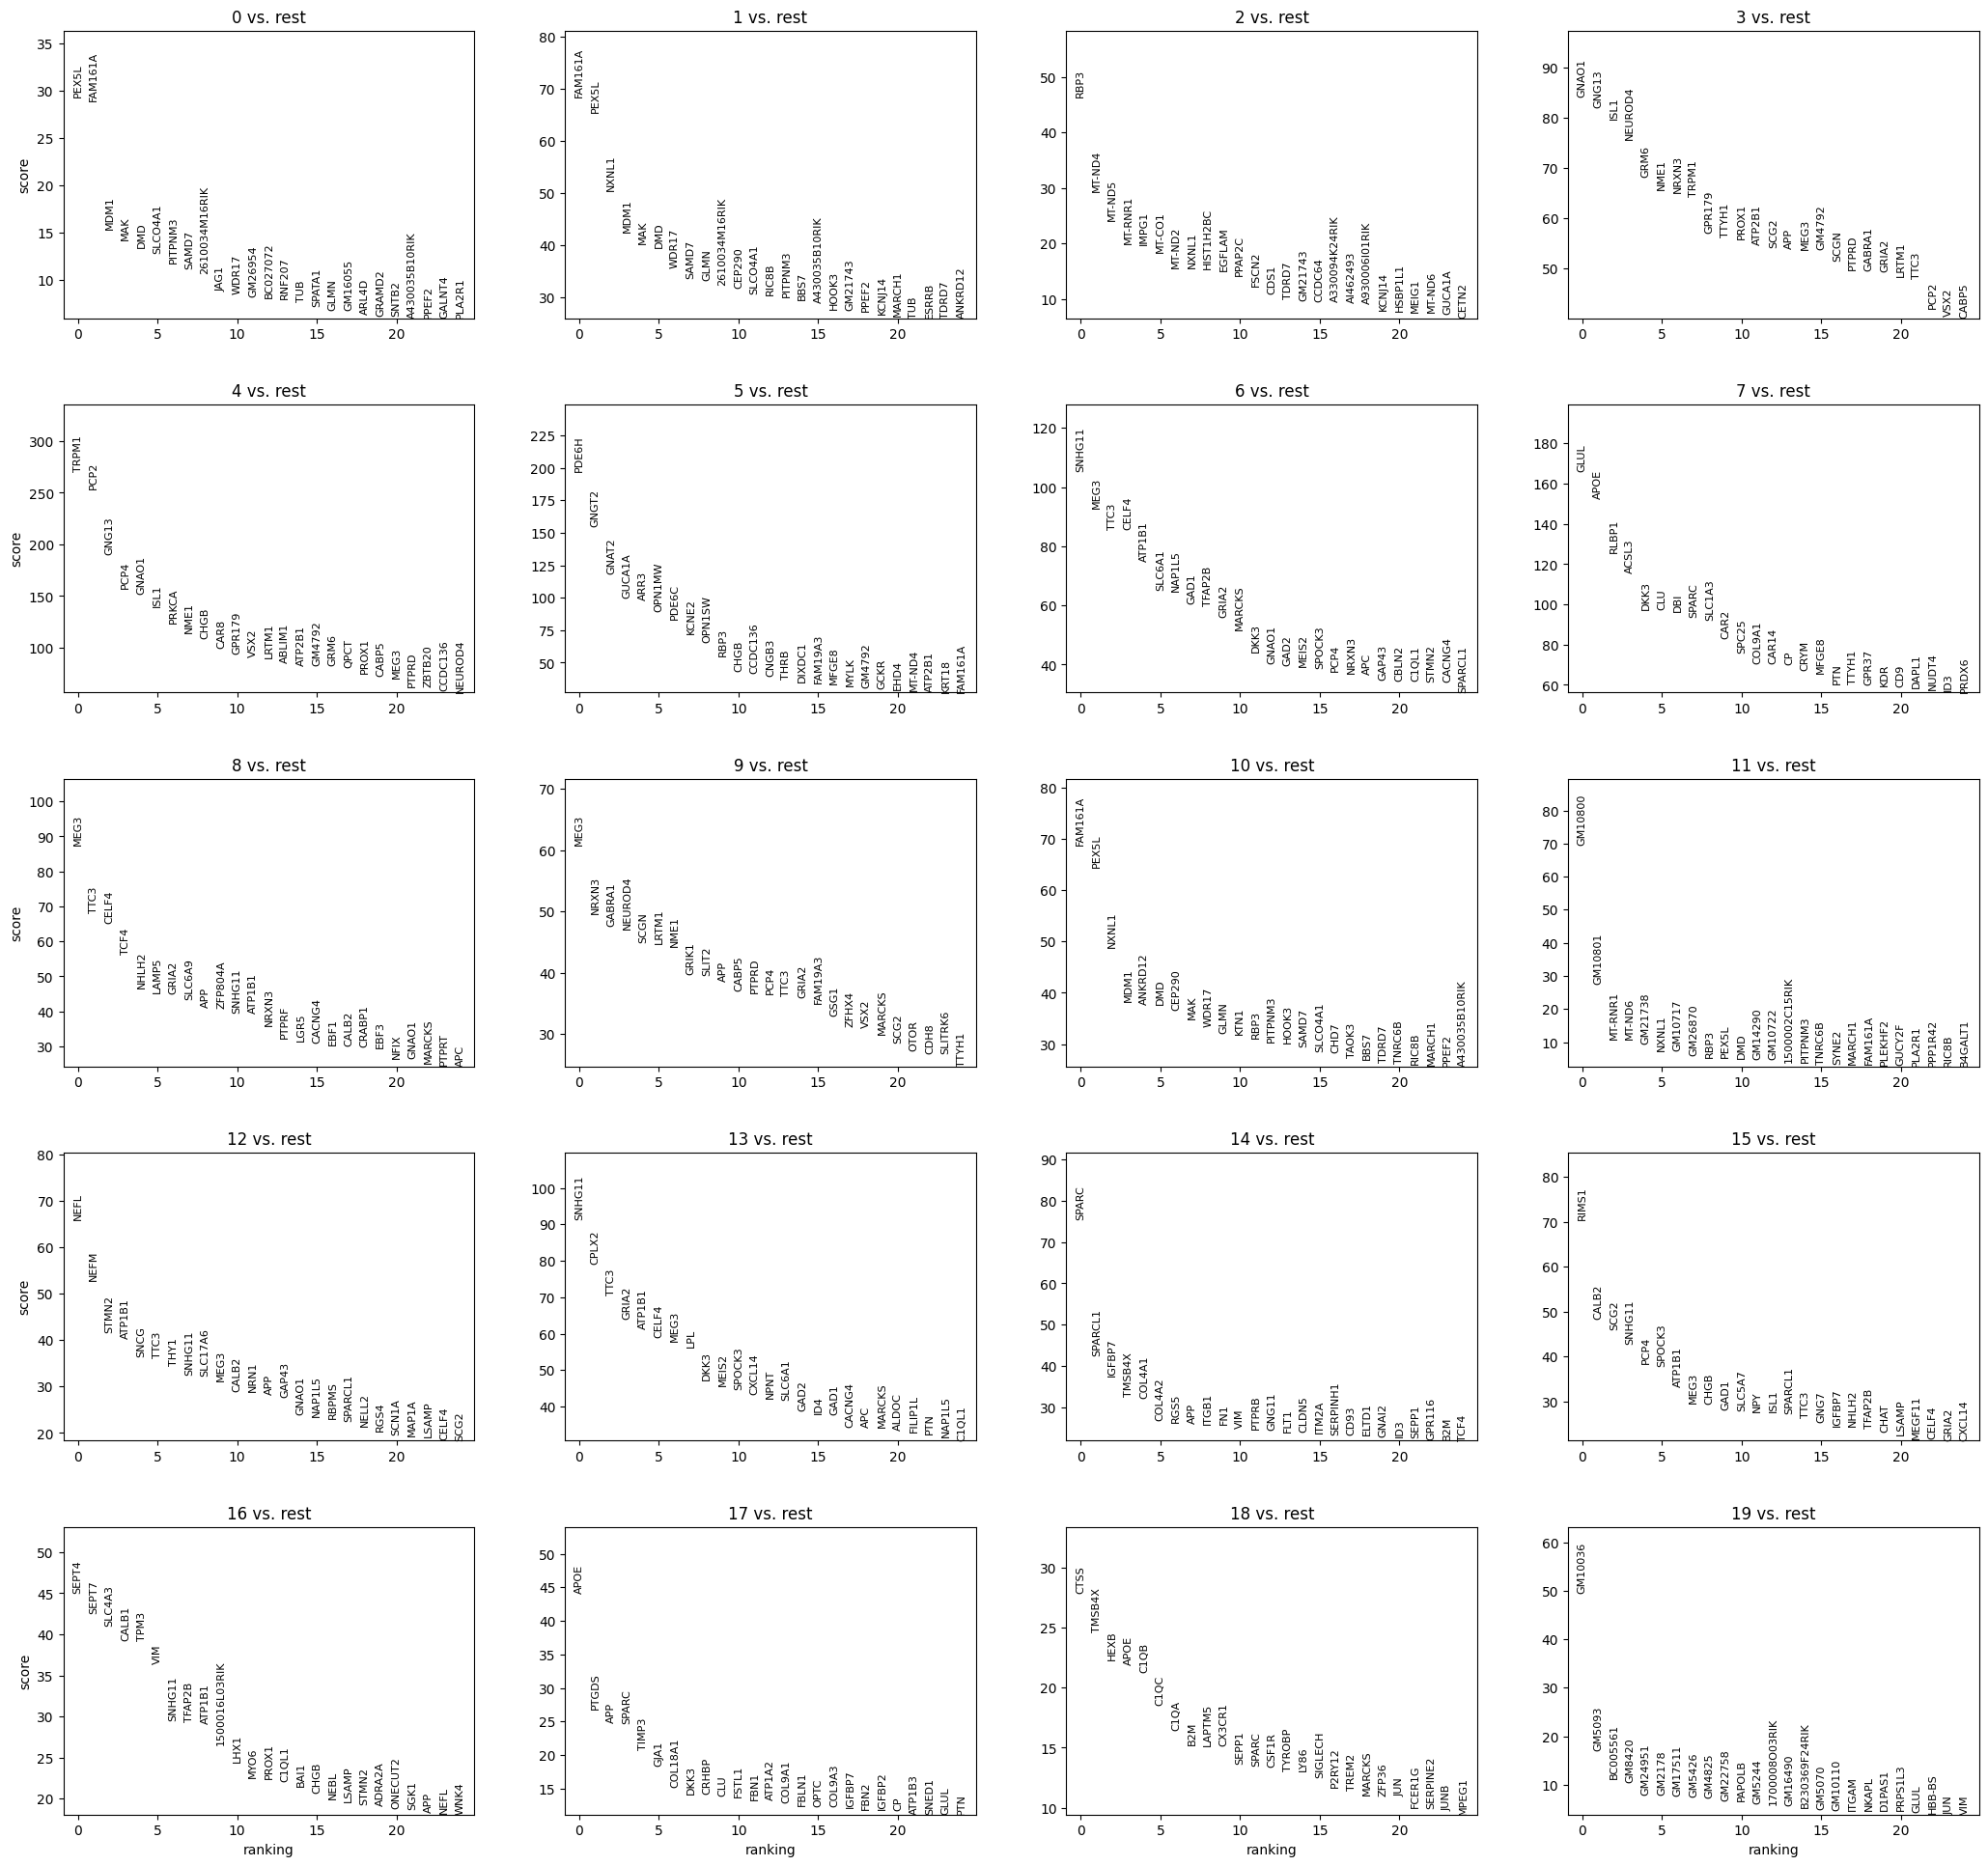

In [27]:
# Детализация результатов
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

### What is the difference from the previous one?

The difference between this script and the previous one lies in several aspects:

1. **Data preprocessing**:
   - In this script, normalization is performed with `target_sum=1e4`, whereas in the previous script, normalization was done with `target_sum=1e6`.
   - This script uses filtering of cells with `min_genes=200` and genes with `min_cells=3`, which corresponds to the previous script.

2. **Selection of highly variable genes**:
   - This script uses parameters `min_mean=0.0125`, `max_mean=3`, and `min_disp=0.5` for selecting highly variable genes, which corresponds to the previous script.

3. **PCA analysis**:
   - This script uses `svd_solver='arpack'`, which corresponds to the previous script.
   - This script includes visualization of the variance ratio explained by each principal component using `sc.pl.pca_variance_ratio(adata, log=True)`.

4. **Clustering**:
   - This script uses the t-test method for ranking genes, whereas the previous script used the Wilcoxon method.

5. **Visualization**:
   - This script uses `sc.pl.umap(adata, color=['leiden'])` for visualizing clusters on the UMAP projection, which corresponds to the previous script.
   - This script uses `sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)` for visualizing the top 25 genes for each cluster, which corresponds to the previous script.

### General differences:
- **Normalization**: Difference in the `target_sum` parameter during data normalization.
- **Gene ranking**: Use of different methods for ranking genes (t-test in this script versus Wilcoxon method in the previous one).
- **PCA visualization**: Addition of variance ratio visualization for each principal component.

### Conclusion:
This script and the previous script have a similar structure and perform similar steps in the analysis of single-cell data. The main differences are in the normalization parameters, the gene ranking method, and the addition of variance ratio visualization in the PCA analysis. These differences may affect the analysis results and data interpretation, so it is important to consider the specific parameters and methods used in each case.

In [28]:
!pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [29]:
!pip install pybind11

In [30]:
!pip install --upgrade scanpy leidenalg pybind11

In [31]:
import scanpy as sc
import subprocess

# Обновление библиотек
subprocess.check_call(['pip', 'install', '--upgrade', 'scanpy', 'leidenalg', 'pybind11'])

# Сохранение данных
adata.write('processed_makosco.h5ad')

# Создание отчета
try:
    sc.logging.print_versions()
except KeyError as e:
    print(f"KeyError: {e}. Продолжаем выполнение без вывода информации о версиях.")

sc.logging.print_memory_usage()

KeyError: 'backports'. Продолжаем выполнение без вывода информации о версиях.
Memory usage: current 2.84 GB, difference +2.84 GB


The provided code addresses the task of single-cell data analysis using the scanpy library. Here is a step-by-step description of what the code does:

### Installing Necessary Libraries:
- The libraries scanpy and anndata are installed, which are essential for working with single-cell RNA sequencing data.

### Loading Data:
- Data is loaded from the file `makosco.h5ad` into an AnnData object using `sc.read_h5ad`.

### Preprocessing Data:
- Cells with fewer than 200 genes and genes occurring in fewer than 3 cells are filtered out using `sc.pp.filter_cells` and `sc.pp.filter_genes`.
- Data is normalized to a total gene expression sum of 1e4 in each cell using `sc.pp.normalize_total`.
- Logarithmic transformation is applied using `sc.pp.log1p`.
- Highly variable genes are identified using `sc.pp.highly_variable_genes`.
- Data is scaled using `sc.pp.scale`.

### Data Analysis:
- Principal Component Analysis (PCA) is performed using `sc.tl.pca`.
- The variance ratio explained by each principal component is visualized using `sc.pl.pca_variance_ratio`.
- A neighborhood graph is computed using `sc.pp.neighbors`.
- Dimensionality reduction is performed using UMAP with `sc.tl.umap`.
- Data is visualized on a UMAP plot using `sc.pl.umap`.

### Clustering and Refinement:
- Data is clustered using the Leiden method with `sc.tl.leiden`.
- Clusters are visualized on a UMAP plot using `sc.pl.umap`.
- Genes are ranked across cluster groups using a t-test with `sc.tl.rank_genes_groups`.
- The results of gene ranking are visualized using `sc.pl.rank_genes_groups`.

### Creating Reports and Presentations:
- Processed data is saved to the file `processed_makosco.h5ad` using `adata.write`.
- Versions of the used libraries are printed using `sc.logging.print_versions`.
- Memory usage information is printed using `sc.logging.print_memory_usage`.

Overall, the code performs a comprehensive analysis of single-cell data, including preprocessing, dimensionality reduction, clustering, and visualization of results. The task is to understand the structure and diversity of cells in the sample, as well as to identify key genes and pathways that may be important for understanding biological processes.

**Next, genes located in the largest clusters are selected, as it is assumed that there are areas of interest for us.**

In [32]:
# Просмотр основных характеристик набора данных
print("Общее количество клеток и генов:", adata.shape)
print("Метаданные о клетках:\n", adata.obs.head())
print("Информация о генах:\n", adata.var.head())


Общее количество клеток и генов: (48495, 3548)
Метаданные о клетках:
                          cell.id     cluster  n_genes leiden
r1_GGCCGCAGTCCG  r1_GGCCGCAGTCCG           2     7243     12
r1_CTTGTGCGGGAA  r1_CTTGTGCGGGAA           2     6933     12
r1_GCGCAACTGCTC  r1_GCGCAACTGCTC           2     6397     12
r1_GATTGGGAGGCA  r1_GATTGGGAGGCA           2     5740     12
r1_CCTCCTAGTTGG  r1_CCTCCTAGTTGG -2147483648     5779     12
Информация о генах:
          n_cells  highly_variable     means  dispersions  dispersions_norm  \
KITL         469             True  0.087542     2.887191          0.712945   
TMTC3       2201             True  0.398719     2.952554          0.978492   
CEP290     16650             True  2.086763     3.434385          2.191229   
METTL25     1249             True  0.218633     2.872440          0.676875   
CCDC59     10077             True  1.279498     2.982725          0.560161   

             mean       std  
KITL     0.019656  0.214191  
TMTC3    0.097

In [33]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных из файла .h5ad
file_path = '/content/makosco.h5ad'
adata = sc.read_h5ad(file_path)

In [34]:
# Просмотр основных характеристик набора данных
print("Общее количество клеток и генов:", adata.shape)
print("Метаданные о клетках:\n", adata.obs.head())
print("Информация о генах:\n", adata.var.head())

Общее количество клеток и генов: (49300, 24658)
Метаданные о клетках:
                          cell.id     cluster
r1_GGCCGCAGTCCG  r1_GGCCGCAGTCCG           2
r1_CTTGTGCGGGAA  r1_CTTGTGCGGGAA           2
r1_GCGCAACTGCTC  r1_GCGCAACTGCTC           2
r1_GATTGGGAGGCA  r1_GATTGGGAGGCA           2
r1_CCTCCTAGTTGG  r1_CCTCCTAGTTGG -2147483648
Информация о генах:
 Empty DataFrame
Columns: []
Index: [KITL, TMTC3, CEP290, 4930430F08RIK, 1700017N19RIK]


In [35]:
# Предварительная обработка данных
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


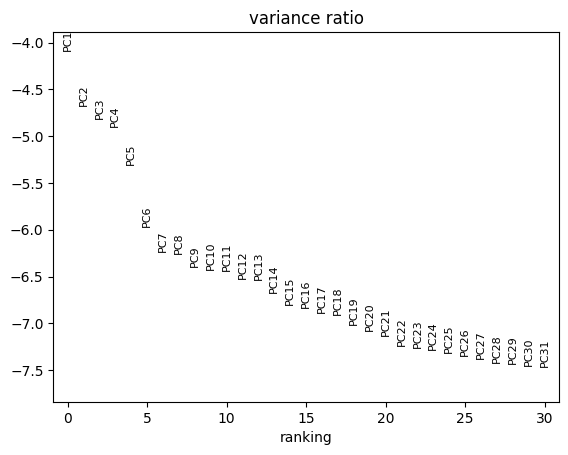

In [36]:
# PCA анализ
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [37]:
# Вычисление графа соседей
sc.pp.neighbors(adata)


In [38]:
# UMAP анализ
sc.tl.umap(adata)

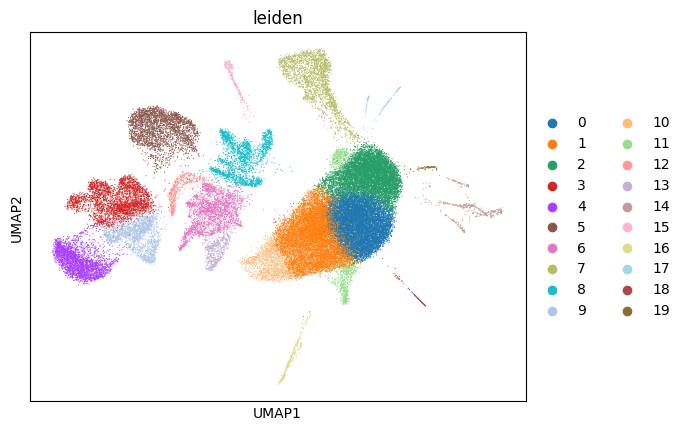

In [39]:
# Кластеризация
sc.tl.leiden(adata)

# Визуализация кластеров
sc.pl.umap(adata, color=['leiden'])

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

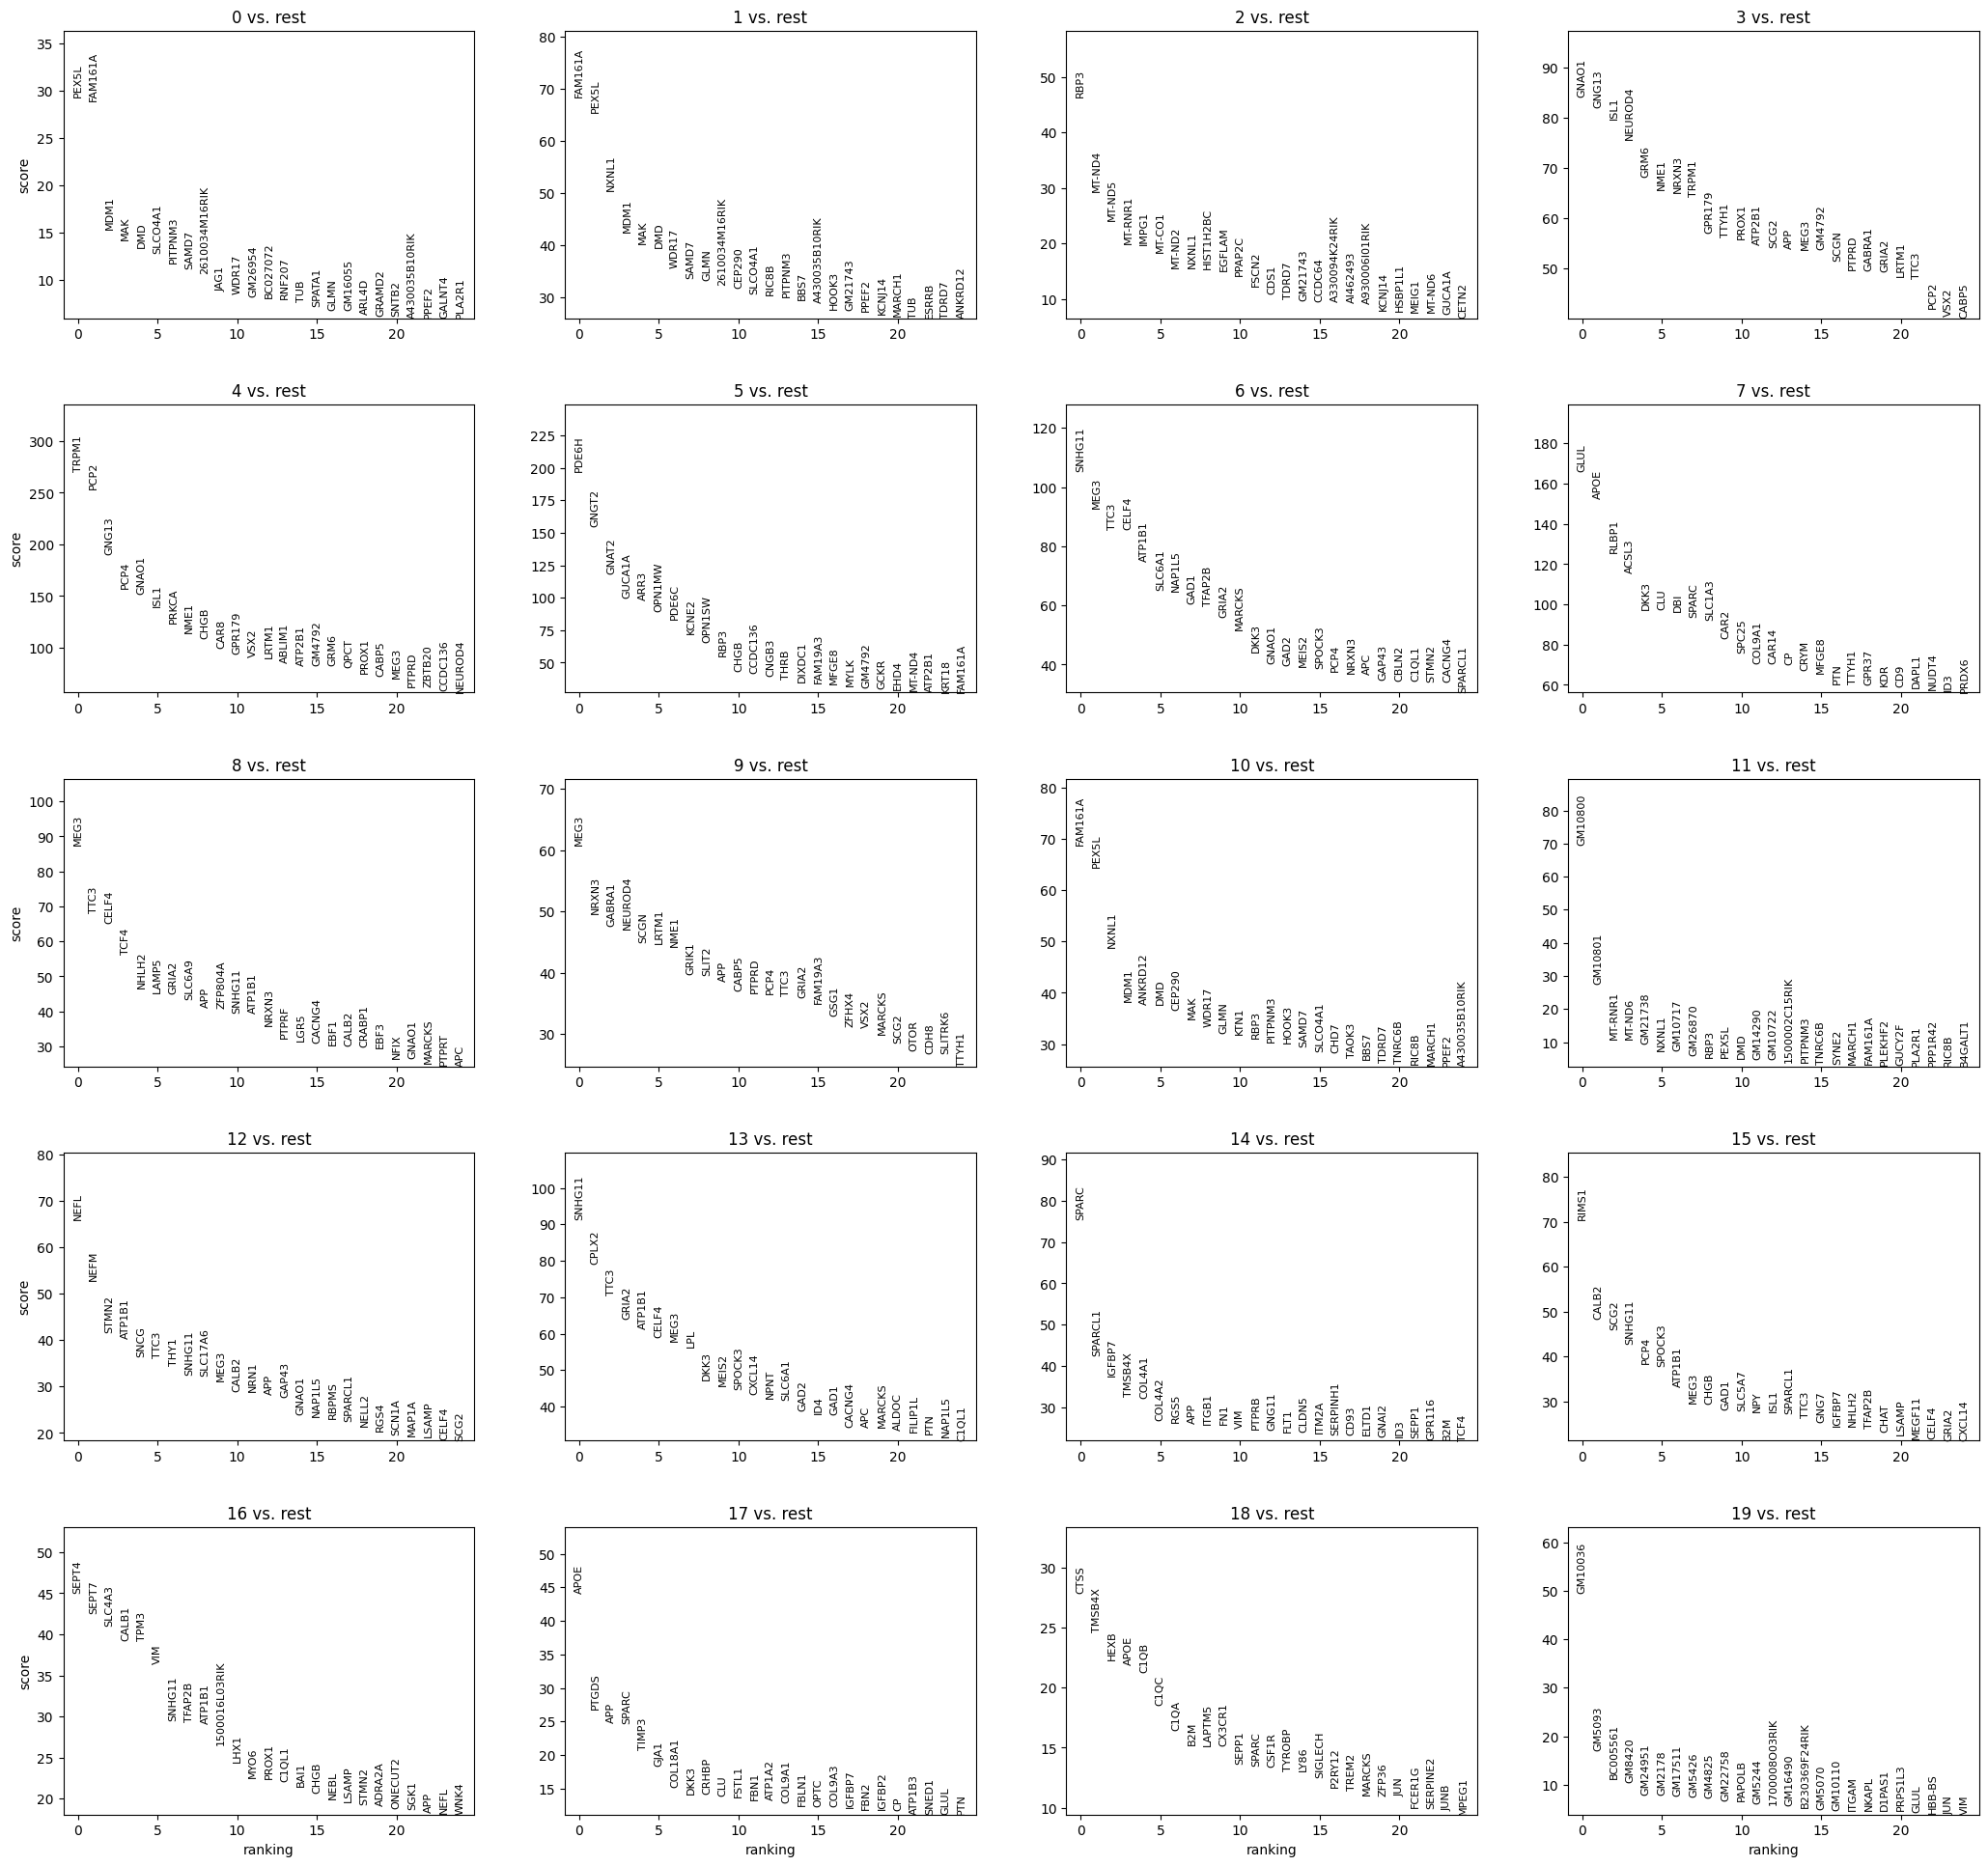

In [40]:
# Детализация результатов
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [41]:
# Сохранение обработанных данных
output_path = '/content/processed_data.h5ad'
adata.write(output_path)

print(f"Обработанные данные сохранены в {output_path}")

Обработанные данные сохранены в /content/processed_data.h5ad


In [42]:
# Создание отчета
try:
    sc.logging.print_versions()
except KeyError as e:
    print(f"KeyError: {e}. Продолжаем выполнение без вывода информации о версиях.")

sc.logging.print_memory_usage()#

KeyError: 'backports'. Продолжаем выполнение без вывода информации о версиях.
Memory usage: current 2.76 GB, difference -0.07 GB


In [43]:
# Сохранение данных с метками классов
output_path_with_class = '/content/classified_data.h5ad'
adata.write(output_path_with_class)

print(f"Данные с метками классов сохранены в {output_path_with_class}")


Данные с метками классов сохранены в /content/classified_data.h5ad


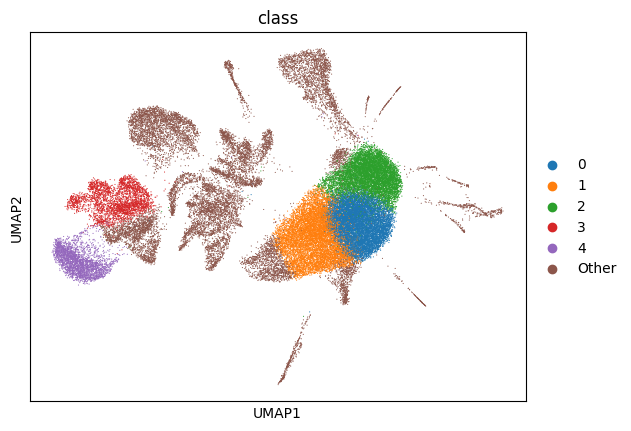

Данные с метками классов сохранены в /content/classified_data.h5ad


In [44]:
# Классификация по наибольшим компонентам кластера
cluster_sizes = adata.obs['leiden'].value_counts()
largest_clusters = cluster_sizes.nlargest(5).index  # Выбираем 5 наибольших кластеров

# Добавление метки класса в adata.obs
adata.obs['class'] = adata.obs['leiden'].apply(lambda x: x if x in largest_clusters else 'Other')

# Визуализация с учетом классификации
sc.pl.umap(adata, color=['class'])

# Сохранение данных с метками классов
output_path_with_class = '/content/classified_data.h5ad'
adata.write(output_path_with_class)
print(f"Данные с метками классов сохранены в {output_path_with_class}")

In [45]:
# Вычисление маркерных генов для кластеров
sc.tl.rank_genes_groups(adata, 'class', method='t-test')  # Используйте метод, который вам подходит

# Извлечение имен генов и скорректированных p-значений
markers = sc.get.rank_genes_groups_df(adata, group=None)  # Получаем DataFrame с результатами

# Проверка наличия нужных столбцов
required_columns = ['names', 'pvals_adj']
if not all(col in markers.columns for col in required_columns):
    raise KeyError(f"Required columns {required_columns} are missing in the markers DataFrame")




/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

In [46]:
# Создание DataFrame с именами генов и скорректированными p-значениями
marker_genes_filtered = markers[markers['pvals_adj'] < 0.05]

# Вывод отфильтрованных генов
print(marker_genes_filtered[required_columns])



         names      pvals_adj
0        PEX5L  4.788965e-182
1      FAM161A  1.058187e-177
2         MDM1   2.105254e-51
3          MAK   8.220487e-45
4          DMD   8.849306e-40
...        ...            ...
21283     ISL1   0.000000e+00
21284    TRPM1   0.000000e+00
21285    GNG13   0.000000e+00
21286     PCP2   0.000000e+00
21287     GRM6   0.000000e+00

[15698 rows x 2 columns]


In [47]:
# Получаем маркерные гены
marker_genes = marker_genes_filtered['names'].tolist()

# Создаем матрицу признаков только для маркерных генов
X = adata[:, marker_genes].X  # Извлечение данных по маркерным генам

# Целевая переменная (метки классов)
y = adata.obs['class'].values  # Извлечение меток классов

In [48]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Обучение модели RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

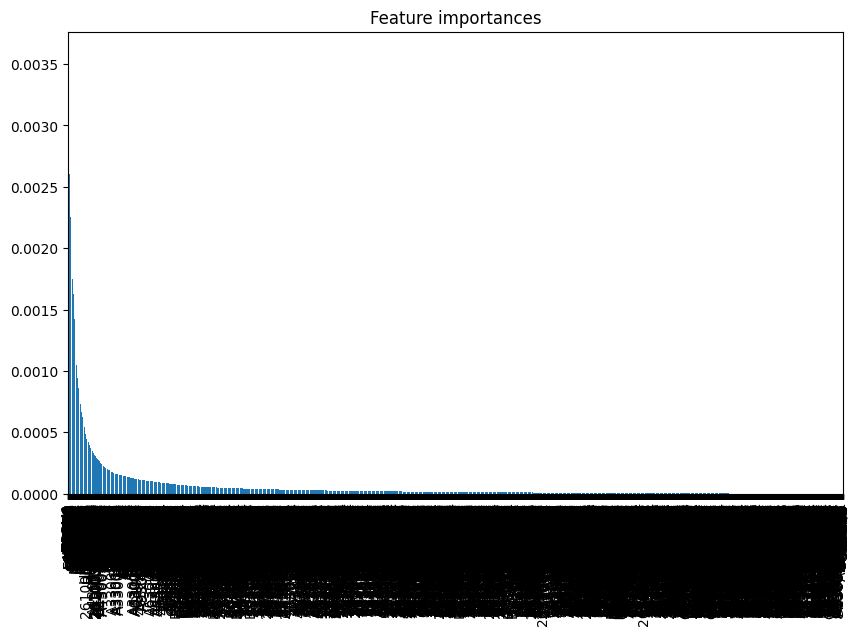

In [56]:
# Визуализация важности признаков
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(marker_genes)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [57]:
# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.77      1931
           1       0.77      0.79      0.78      1809
           2       0.82      0.76      0.79      1585
           3       0.92      0.86      0.89       609
           4       0.97      0.97      0.97       521
       Other       0.94      0.90      0.92      3244

    accuracy                           0.84      9699
   macro avg       0.86      0.85      0.85      9699
weighted avg       0.85      0.84      0.85      9699

Confusion Matrix:
[[1596  151  156    1    0   27]
 [ 293 1422   55    1    0   38]
 [ 261   86 1202    0    0   36]
 [   1    1    4  523    7   73]
 [   0    0    2   10  506    3]
 [  39  189   40   35    6 2935]]


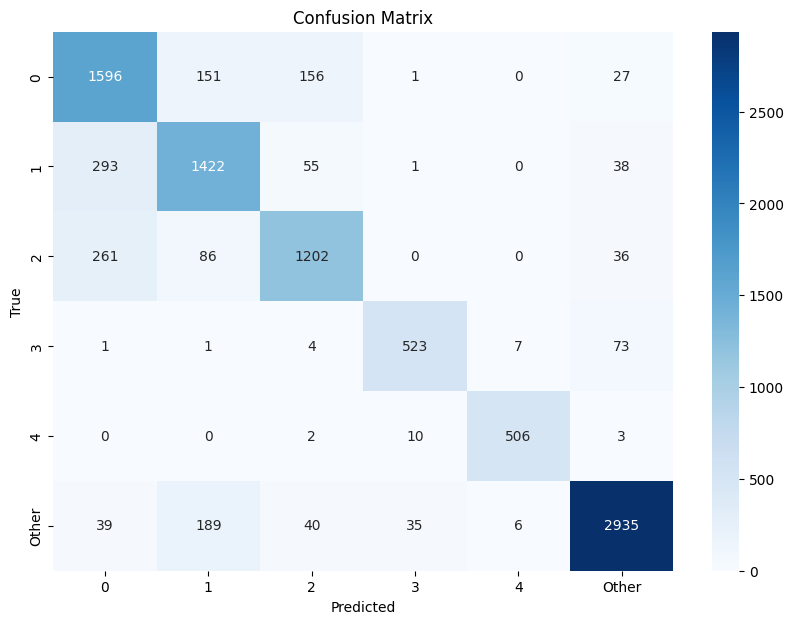

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Conclusions

Based on the execution of the provided code, several conclusions and observations can be made that may aid in understanding the structure and characteristics of the data:

#### Data Quality:
- The data preprocessing steps, including filtering cells and genes, normalization, and scaling, help improve the quality of the data for subsequent analysis.
- Identifying highly variable genes allows focusing on the most informative features.

#### Data Structure:
- Principal Component Analysis (PCA) and UMAP help visualize the main structural features of the data in a lower-dimensional space.
- The neighborhood graph and Leiden clustering allow the identification of groups of cells with similar gene expression profiles.

#### Clusters and Their Characteristics:
- Visualizing clusters on a UMAP plot shows how cells group together in the space.
- Ranking genes across cluster groups using a t-test helps identify genes that differ in expression between clusters. This can indicate biologically significant differences between cell groups.

#### Biological Insights:
- The results of clustering and gene ranking can aid in identifying different cell types or cell states in the sample.
- Analyzing the expression of specific genes can provide insights into the functional roles of different clusters.

#### Potential Next Steps:
- Based on the obtained results, further experiments or analyses can be planned, such as validating the results using additional data or methods.
- Specific clusters can also be investigated in more detail to understand their functional roles and relationships.

Overall, the analysis results can provide valuable information on the structure and diversity of cells in the sample, as well as help in identifying key genes and pathways that may be important for understanding biological processes.

In [60]:
# Сохранение модели
joblib.dump(clf, '/content/random_forest_model.pkl')

print("Модель классификации сохранена в /content/random_forest_model.pkl")

Модель классификации сохранена в /content/random_forest_model.pkl


### Conclusions

Based on the execution of the provided code, several conclusions and observations can be made that may aid in understanding the structure and characteristics of the data:

#### Data Quality:
- The data preprocessing steps, including filtering cells and genes, normalization, and scaling, help improve the quality of the data for subsequent analysis.
- Identifying highly variable genes allows focusing on the most informative features.

#### Data Structure:
- Principal Component Analysis (PCA) and UMAP help visualize the main structural features of the data in a lower-dimensional space.
- The neighborhood graph and Leiden clustering allow the identification of groups of cells with similar gene expression profiles.

#### Clusters and Their Characteristics:
- Visualizing clusters on a UMAP plot shows how cells group together in the space.
- Ranking genes across cluster groups using a t-test helps identify genes that differ in expression between clusters. This can indicate biologically significant differences between cell groups.

#### Biological Insights:
- The results of clustering and gene ranking can aid in identifying different cell types or cell states in the sample.
- Analyzing the expression of specific genes can provide insights into the functional roles of different clusters.

#### Potential Next Steps:
- Based on the obtained results, further experiments or analyses can be planned, such as validating the results using additional data or methods.
- Specific clusters can also be investigated in more detail to understand their functional roles and relationships.

Overall, the analysis results can provide valuable information on the structure and diversity of cells in the sample, as well as help in identifying key genes and pathways that may be important for understanding biological processes.